### Configuration

In [4]:
args = {
  'top': 10,
  'industry': 'biotechnology'
}

### Libraries

In [1]:
import pandas as pd

import utils.args as Args
import constants as Const
import utils.file as File
import utils.logger as Logger
import utils.visualiser as Visualiser

def get_top_country_year_count(top_firms):
  top_country_year_count = top_firms.groupby(['Founded Year', 'Country']).size().unstack()
  return top_country_year_count[top_country_year_count.sum().sort_values(ascending=False).index]

def get_top_country_year_percent(top_firms):
  top_country_year_percent = top_firms.groupby(['Founded Year', 'Country']).size() \
    .groupby(level=0).apply(lambda x: x / float(x.sum()) * 100) \
    .reset_index(level=0, drop=True) \
    .unstack()
  return top_country_year_percent[top_country_year_percent.sum().sort_values(ascending=False).index]


### Run

In [6]:
firms = File.read_pickle(f"{args['industry']}_firms")

pickle/biotechnology_firms.pkl


In [13]:
country_count = firms['Country'].value_counts()
year_count = firms['Founded Year'].value_counts().sort_index()

In [8]:
top_country_count = country_count.head(args['top'])
top_firms = firms[firms['Country'].isin(top_country_count.index)]
top_country_year_count = top_firms.groupby(['Founded Year', 'Country']).size().unstack()

top_country_year_percent = get_top_country_year_percent(top_firms)


In [10]:
top_country_count_excl_us = country_count[country_count.index != 'United States'].head(args['top'])
top_firms_excl_us = firms[firms['Country'].isin(top_country_count_excl_us.index)]
top_country_year_count_excl_us = get_top_country_year_count(top_firms_excl_us)
top_country_year_percent_excl_us = get_top_country_year_percent(top_firms_excl_us)


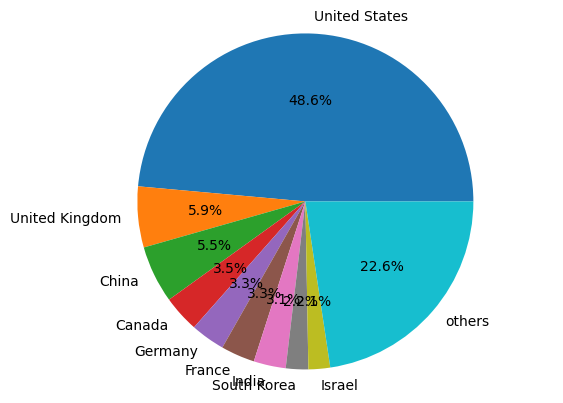

In [11]:
Visualiser.pie(country_count)
Visualiser.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


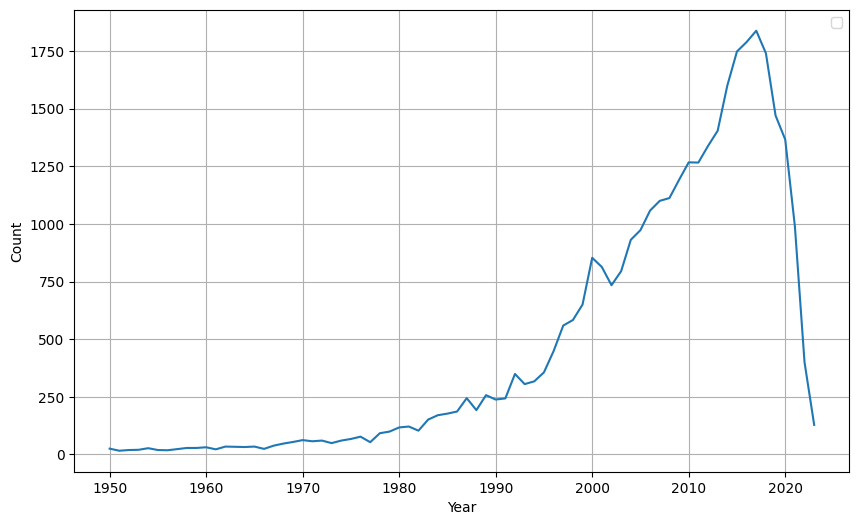

In [14]:

Visualiser.plot(year_count)
Visualiser.show()


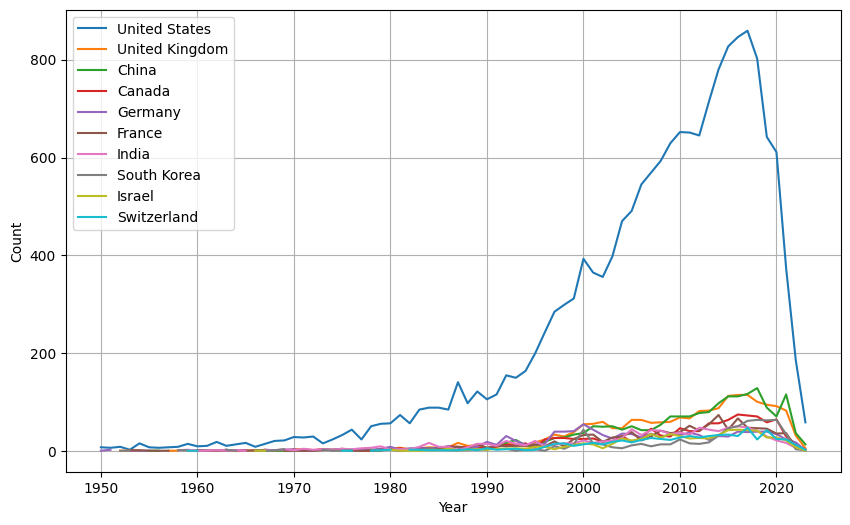

In [15]:
Visualiser.plot_(top_country_year_count)
Visualiser.show()

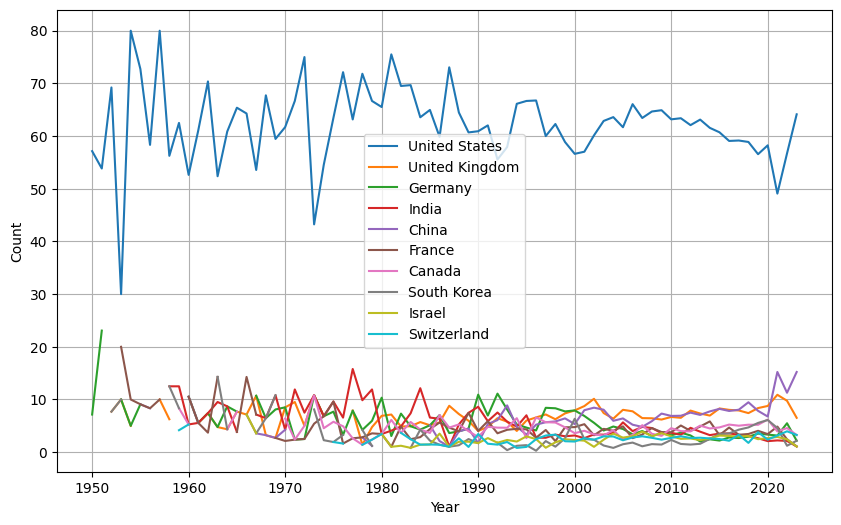

In [16]:
Visualiser.plot_(top_country_year_percent)
Visualiser.show()

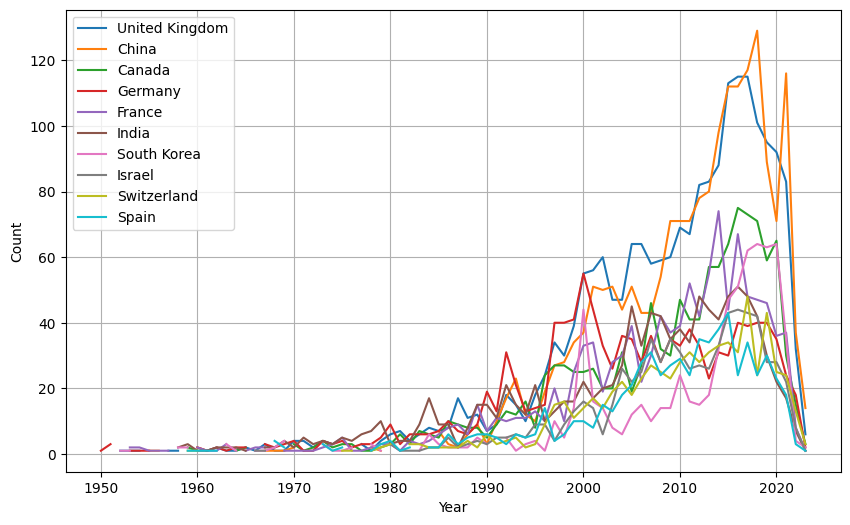

In [17]:
Visualiser.plot_(top_country_year_count_excl_us)
Visualiser.show()

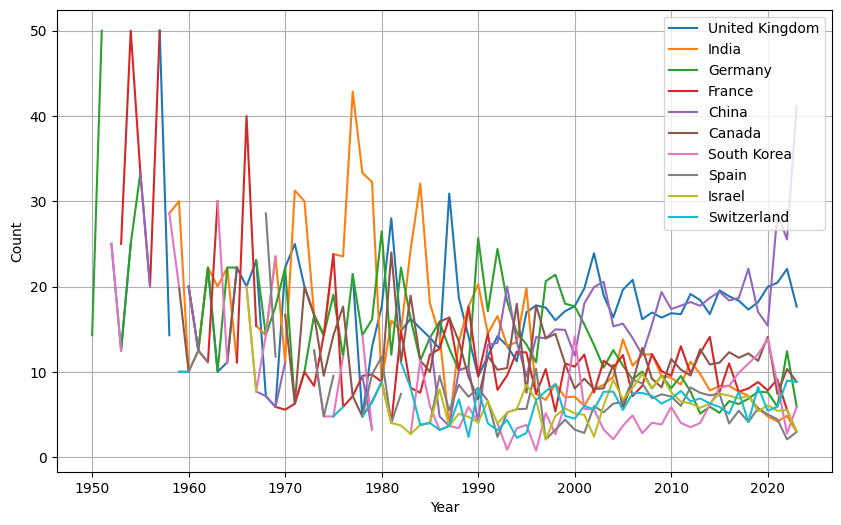

In [18]:
Visualiser.plot_(top_country_year_percent_excl_us)
Visualiser.show()

In [20]:
list = [21, 15, 10, 7, 7, 8, 5, 32, 31,  13, 21, 19, 31, 15, 23, 19, 9, 50, 32, 13, 9, 54, 43, 43, 38, 15, 13, 62, 9, 10, 12, 13, 6, 41, 10, 17, 15, 23, 33,  37, 28, 8, 93, 30, 23, 33, 16, 12]
sum(list)

1127